# Q 1: Email Spam

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
spam_df = pd.read_csv('Spam.csv')
spam_df.head()

,word_make,word_address,word_all,word_3d,word_our,word_over,word_remove,word_internet,word_order,word_mail,...,char_semicolon,char_leftbrac,char_leftsquarebrac,char_exclaim,char_dollar,char_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,3.756,61,278,1
1,1,1,1,0,1,1,1,1,0,1,...,0,1,0,1,1,1,5.114,101,1028,1
2,1,0,1,0,1,1,1,1,1,1,...,1,1,0,1,1,1,9.821,485,2259,1
3,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,3.537,40,191,1
4,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,3.537,40,191,1


In [3]:
spam_df.isnull().any().sum()

0

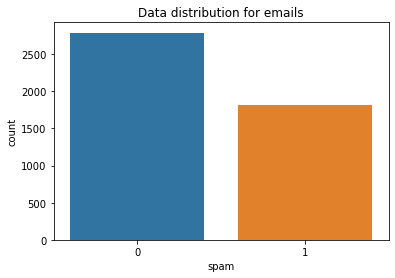

In [4]:
sns.countplot(spam_df['spam'])
plt.title("Data distribution for emails")
plt.show()

### splitting the data

Before spliting the data we need to define our X and y variables as follows
<li>X --> all the dependent variables</li>
<li>y --> the independent variable which is <strong>spam</strong></li>


In [5]:
X = spam_df.drop('spam', axis=1)
y = spam_df['spam']

print(X.shape, y.shape)

(4601, 57) (4601,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

print("X train: {}".format(X_train.shape))
print("y train: {}".format(y_train.shape))
print("X test: {}".format(X_test.shape))
print("y test: {}".format(y_test.shape))

X train: (3220, 57)
y train: (3220,)
X test: (1381, 57)
y test: (1381,)


### Building a KNN model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_score = []

for k in range(1,50):
    clfr = KNeighborsClassifier(n_neighbors=k)
    clfr.fit(X_train, y_train)
    y_pred = clfr.predict(X_test)
    vals = [k, accuracy_score(y_test, y_pred)]
    acc_score.append(vals)

# converting the multidimentional list into a numpy array
acc_score = np.array(acc_score)

print("Best Model accuracy is : {}".format(max(acc_score[:, 1])))

Best Model accuracy is : 0.7965242577842143


### Logistic regression Model

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_lr = logreg.predict(X_test)

# Evaluation using metric score
lr_score = logreg.score(X_test, y_test)
print(f"Logistic Regression accuracy: {lr_score}")

print("*"*100)

# Evaluating using confussion matrix
print('\nModel evaluation using confusion matrix')
cnfsnmtx = confusion_matrix(y_test, pred_lr)
print(cnfsnmtx)

print("*"*100)

# Evaluation using classification report
print('\nModel evaluation using confusion classification report')
target_names = ['Spam','No spam']
print(classification_report(y_test, pred_lr, target_names=target_names))


Logistic Regression accuracy: 0.9355539464156408
****************************************************************************************************

Model evaluation using confusion matrix
[[797  37]
 [ 52 495]]
****************************************************************************************************

Model evaluation using confusion classification report
              precision    recall  f1-score   support

        Spam       0.94      0.96      0.95       834
     No spam       0.93      0.90      0.92       547

    accuracy                           0.94      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.94      0.94      0.94      1381



### Best model to classify the data

From the two models, Logistic regression performed well on the test data, showing up with an accuracy of 94%.<br>
Logistic regression performs well on data with binary classes such as the email spam data.

The data distrinution is unequal i.e 
<li>spam (0) emails : 2788</li>   
<li>spam (1) emails : 1813</li> 
  
this makes KNN perform poorly with an accuracy of 80% compared to Logisutc regression

# Q 2: Diabetes Dataset

In [9]:
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True, as_frame=True)


In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


### Data partitioning

In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=20)


print("X train: {}".format(X_train2.shape))
print("y train: {}".format(y_train2.shape))
print("X test: {}".format(X_test2.shape))
print("y test: {}".format(y_test2.shape))

X train: (422, 10)
y train: (422,)
X test: (20, 10)
y test: (20,)


### Predictive moddeling

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train2, y_train2)

# Intercept
print("intercept : ", model.intercept_)
print('-'*50)

# slope
print("Slope : ", model.coef_)
print('-'*50)

# predict
y_pred = model.predict(X_test2)
print("Predicted vals : ", y_pred, sep='\n')
print('-'*50)

md_score = model.score(X_train2, y_train2)
print('Variance: ', md_score)

intercept :  152.0008343347763
--------------------------------------------------
Slope :  [ -26.46608224 -235.44757576  500.94082644  334.3972853  -815.93986437
  484.88347586  112.56720618  172.20767169  763.37896837   89.9680102 ]
--------------------------------------------------
Predicted vals : 
[176.53499718 149.43172522 117.43382298 123.04725699 168.99262106
 100.29291866 151.76128219 165.30960047 158.88663872 127.04585978
 140.6780114  109.32943475 265.83327071 143.90873797 110.4986068
 231.38105143 153.26834535 149.08367989 200.85179744 151.79911697]
--------------------------------------------------
Variance:  0.5181501703972787


### Physiological factors examination

In [14]:
X_cols = X.columns.values
type(X_cols)

numpy.ndarray

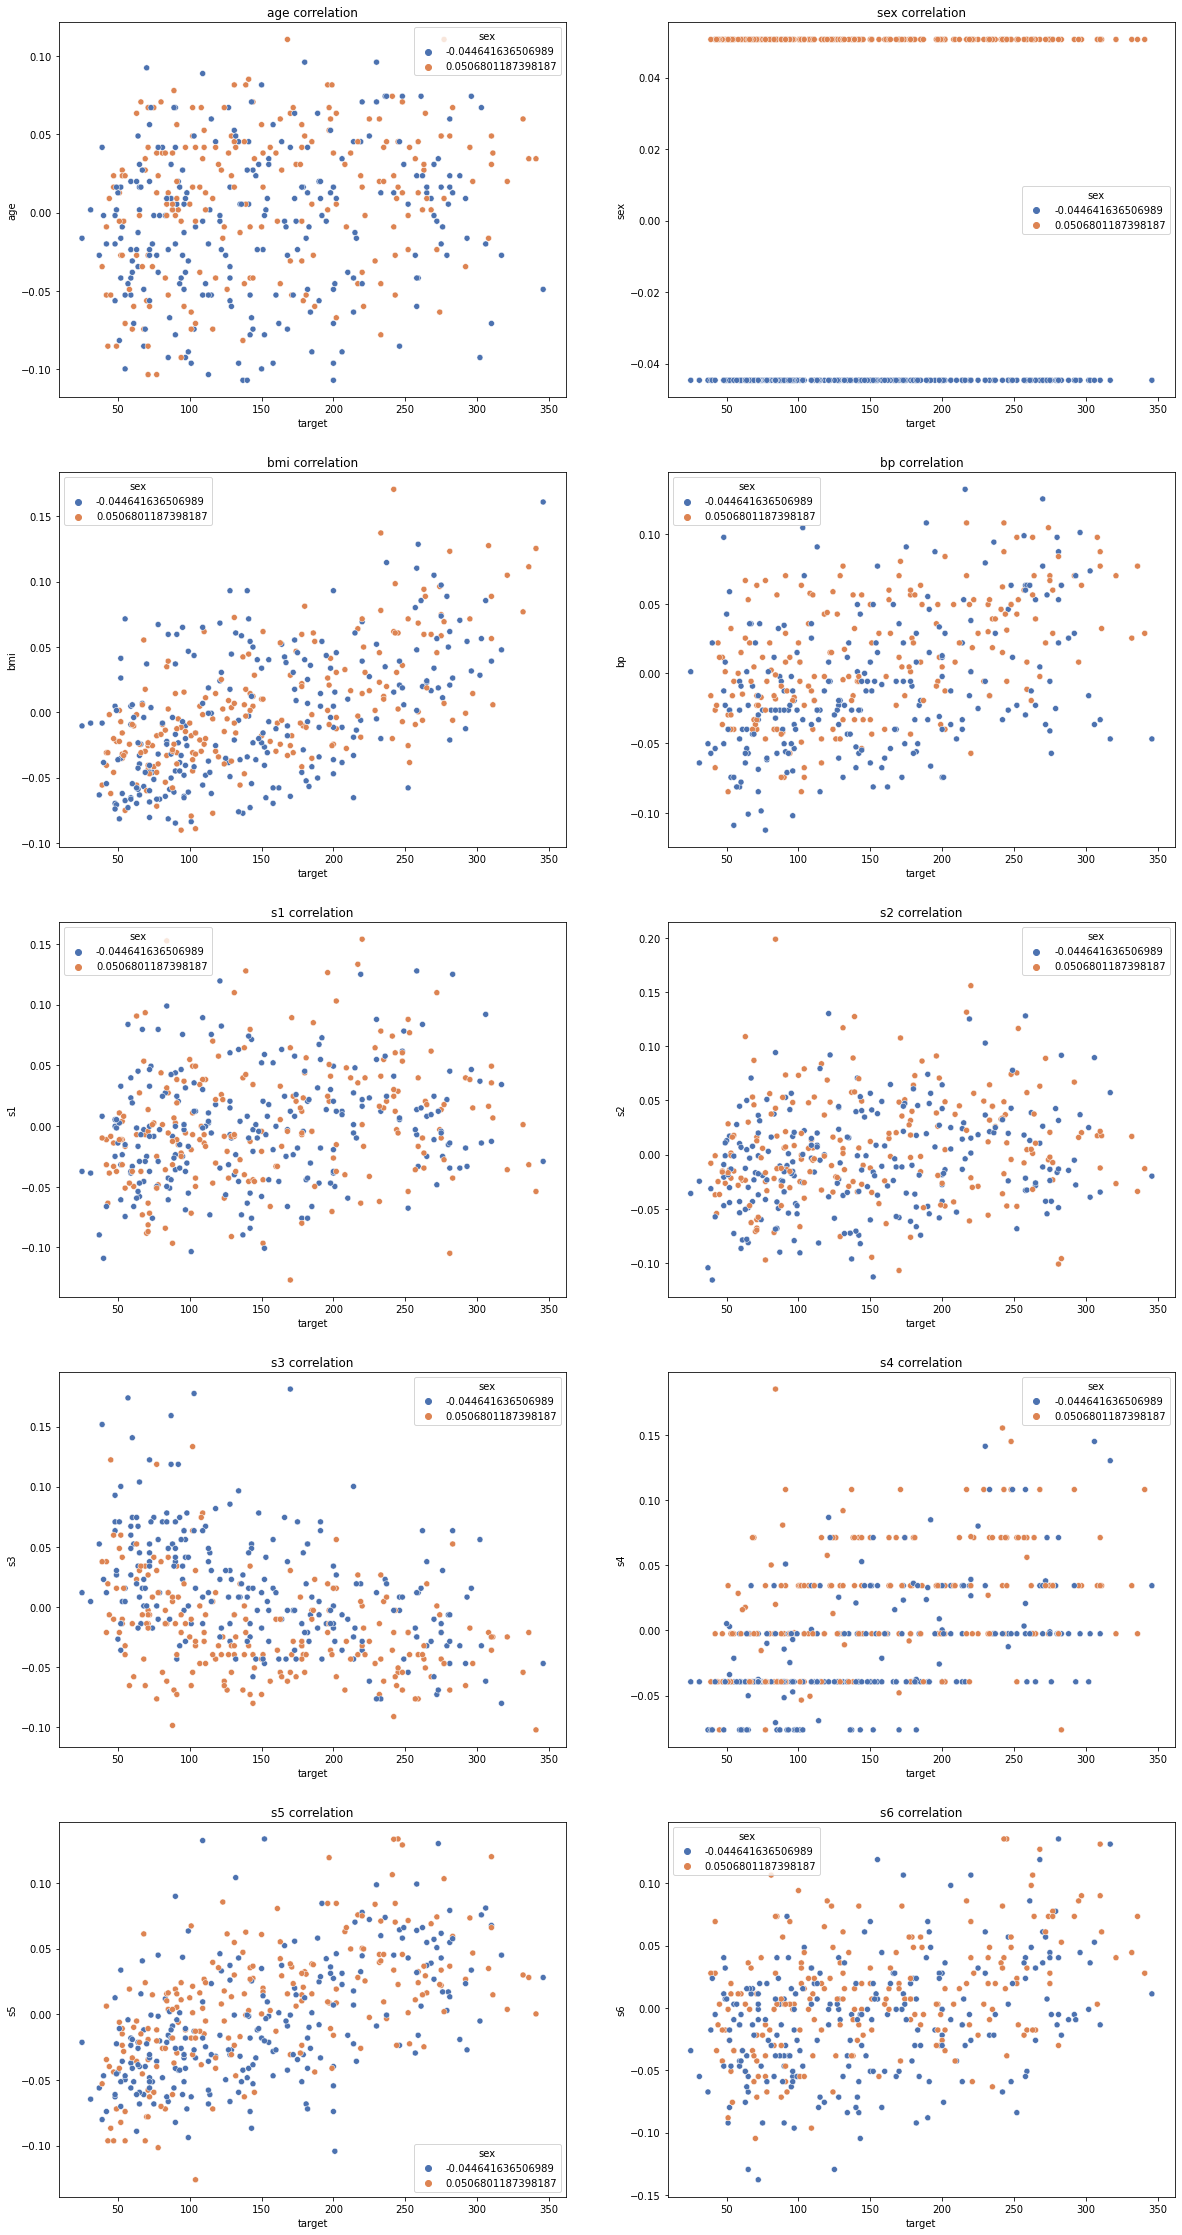

In [15]:

fig = plt.figure(figsize=(20,40))
for i in range(len(X.columns)):
    column = X.columns[i]
    sub = fig.add_subplot(5,2,i+1)
    chart = sns.scatterplot(data = X, y = column, x = y, hue='sex', palette='deep')
    plt.title(f"{column} correlation")


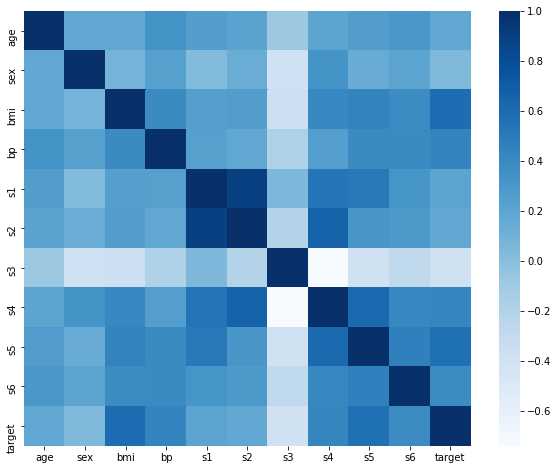

In [16]:
# Join the data frames
unsplitted_data = pd.concat([X,y], axis=1)

# find the coreration of all the variables
cor = unsplitted_data.corr()

# heat map visual
fig = plt.figure(figsize=(10,8))
sns.heatmap(cor, cmap='Blues')
plt.show()

The more dark or bright a variable is in relation to another variable, the more strongly positive or strongly negative respectively the correlation is.

# Q 3: Guessing Game

In [17]:
from random import randint
import keyboard


def guess():
    trials = 3
    comp_guess = randint(1,20)
    guess_count=0
    
    while guess_count < trials:
        guess_count += 1
        my_guess = int(input('Guess a number: '))
        if my_guess > comp_guess:
            print('Guess too High, Try a smaller number!')
        elif my_guess < comp_guess:
            print("Guess too low, Try a bigger number")
        else:
            print("Congrats! You got it")
            break
    print(f"The correct guess is : {comp_guess}")
    
    if (guess_count == 1) & (my_guess == comp_guess):
        print('You have 10 points')
    elif (guess_count == 2) & (my_guess == comp_guess):
        print('You have 5 points')
    elif (guess_count == 3) & (my_guess == comp_guess):
        print('You have 1 point')
    else:
        print('You got 0 points')



while True:
    i = input('Want to play the guessing game? (Y/n)')
    # if i == keyboard.is_pressed('Y')==True:
    if i == 'y':
        guess()
    else:
        print('Quitting game...')
        break
    

Want to play the guessing game? (Y/n)y
Guess a number: 12
Guess too low, Try a bigger number
Guess a number: 16
Guess too low, Try a bigger number
Guess a number: 18
Guess too High, Try a smaller number!
The correct guess is : 17
You got 0 points
Want to play the guessing game? (Y/n)y
Guess a number: 7
Guess too low, Try a bigger number
Guess a number: 10
Guess too low, Try a bigger number
Guess a number: 15
Guess too High, Try a smaller number!
The correct guess is : 11
You got 0 points
Want to play the guessing game? (Y/n)y
Guess a number: 13
Guess too low, Try a bigger number
Guess a number: 16
Guess too High, Try a smaller number!
Guess a number: 15
Guess too High, Try a smaller number!
The correct guess is : 14
You got 0 points
Want to play the guessing game? (Y/n)y
Guess a number: 10
Guess too High, Try a smaller number!
Guess a number: 7
Guess too low, Try a bigger number
Guess a number: 8
Guess too low, Try a bigger number
The correct guess is : 9
You got 0 points
Want to play 